In [ ]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikeras
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=874923074102ee7610790485f2f0e007f03886ac531b702837d04b38

In [ ]:
from typing import List
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import random
from matplotlib import pyplot
from matplotlib.colors import ListedColormap

import os, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight, compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    LeaveOneOut,
    cross_val_score,
    train_test_split,
)

import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Spaceship Titanic/kaggle.json" ~/.kaggle/
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           4896        120  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          11451        218  1.0              
juledz/heart-attack-prediction                                     Heart Attack Prediction                              8KB  2024-01-19 16:11:46           1483         38  1.0              
joebeachcapital/57651-spotify-songs               

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Spaceship Titanic/Dati/"
IMAGE_PATH = "/content/drive/MyDrive/Spaceship Titanic/Immagini/Tecniche di ML/"
OUTPUT_PATH = "kaggle_submissions/"

In [ ]:
dataset_13 = pd.read_csv(DATA_PATH + "train_13.csv")
train_13, y_train_13 = dataset_13.drop(columns=['Unnamed: 0','Transported']), dataset_13.Transported
train_13

,gggg,Deck,Cabin_num,Side,HomePlanet,Destination,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,1,0,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,5,0,1,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,1,1,0,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,1,1,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,5,1,1,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,98,0,1,1,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,6,1499,1,0,2,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,6,1500,1,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,4,608,1,1,1,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
dataset_22 = pd.read_csv(DATA_PATH + "train_22.csv")
train_22, y_train_22 = dataset_22.drop(columns=['Unnamed: 0','Transported']), dataset_22.Transported
train_22

,gggg,Deck_B,Deck_C,Deck_E,Deck_F,Deck_G,Cabin_num,Side_P,Side_S,HomePlanet_Earth,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,1,0,0,0,1,1,...,0,0,1,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,0,0,0,1,0,1,0,1,1,...,0,0,1,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,0,0,0,0,98,1,0,0,...,1,0,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,0,0,0,0,1,1499,0,1,1,...,0,1,0,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,0,0,0,0,1,1500,0,1,1,...,0,0,1,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,0,0,1,0,0,608,0,1,0,...,1,0,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


Si creano dieci sottoinsiemi di train-test sempre uguali

In [ ]:
skf = StratifiedKFold(n_splits=10)
cross_validation_13 = skf.get_n_splits(train_13, y_train_13)
cross_validation_22 = skf.get_n_splits(train_22, y_train_22)

Uso parametri di default per GradientBoosting

In [ ]:
grb = GradientBoostingClassifier()
scores = cross_val_score(grb, train_13, y_train_13, cv=cross_validation_13)
print("Accuratezza default GradientBoosting 13 per ogni singolo sottoinsieme di training: ")
print(scores)
print("\nAccuratezza media default GradientBoosting 13: ")
print(scores.mean())

scores = cross_val_score(grb, train_22, y_train_22, cv=cross_validation_22)
print("\nAccuratezza default GradientBoosting 22 per ogni singolo sottoinsieme di training: ")
print(scores)
print("\nAccuratezza media default GradientBoosting 22: ")
print(scores.mean())

Accuratezza default GradientBoosting 13 per ogni singolo sottoinsieme di training: 
[0.79310345 0.76091954 0.71609195 0.67433832 0.76179517 0.80897583
 0.81818182 0.81012658 0.80897583 0.70080552]

Accuratezza media default GradientBoosting 13: 
0.7653314021930347

Accuratezza default GradientBoosting 22 per ogni singolo sottoinsieme di training: 
[0.79310345 0.72643678 0.69195402 0.69620253 0.75949367 0.81472957
 0.81357883 0.82393556 0.81818182 0.71116226]

Accuratezza media default GradientBoosting 22: 
0.7648778487626152


Setting n_estimators

In [ ]:
def set_n_estimators(train, test, estimators:np.ndarray):
  columns = ['N_Estimators', 'Score']
  estimators_score = pd.DataFrame(columns=columns)

  for e in estimators:
    grb = GradientBoostingClassifier(n_estimators=e)
    scores = cross_val_score(grb, train, test, cv=10)
    row = pd.DataFrame(data=[[e, scores.mean()]], columns=columns)
    estimators_score = pd.concat([estimators_score, row])

  return estimators_score

In [ ]:
estimators = np.linspace(10, 150, 15, dtype=int)
estimators_score_13 = set_n_estimators(train_13, y_train_13, estimators)
estimators_score_13

,N_Estimators,Score
0,10,0.761650
0,20,0.785234
0,30,0.790067
0,40,0.786960
0,50,0.784425
0,60,0.775339
0,70,0.775108
0,80,0.772463
0,90,0.768208
0,100,0.765331


In [ ]:
estimators = np.linspace(10, 150, 15, dtype=int)
estimators_score_22 = set_n_estimators(train_22, y_train_22, estimators)
estimators_score_22

,N_Estimators,Score
0,10,0.759926
0,20,0.786499
0,30,0.790524
0,40,0.783049
0,50,0.783049
0,60,0.782934
0,70,0.777757
0,80,0.775803
0,90,0.767292
0,100,0.764648


n_estimators migliore per train_13: 30

n_estimators migliore per train_22:

Setting learning_rate

In [ ]:
def set_learning_rate(train, test):
  columns = ['Learning_Rate', 'Score']
  learning_rate_score = pd.DataFrame(columns=columns)
  learning_rates = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]

  for l in learning_rates:
    grb = GradientBoostingClassifier(n_estimators=30, learning_rate=l)
    scores = cross_val_score(grb, train, test, cv=10)
    row = pd.DataFrame(data=[[l, scores.mean()]], columns=columns)
    learning_rate_score = pd.concat([learning_rate_score, row])

  return learning_rate_score

In [ ]:
learning_rate_score_13 = set_learning_rate(train_13, y_train_13)
learning_rate_score_13

,Learning_Rate,Score
0,0.10,0.790067
0,0.11,0.790295
0,0.12,0.789606
0,0.13,0.786268
0,0.14,0.788916
0,0.15,0.787995
0,0.16,0.785808
0,0.17,0.769587
0,0.18,0.783739
0,0.19,0.780060


In [ ]:
learning_rate_score_22 = set_learning_rate(train_22, y_train_22)
learning_rate_score_22

,Learning_Rate,Score
0,0.10,0.790524
0,0.11,0.786958
0,0.12,0.785347
0,0.13,0.785924
0,0.14,0.785118
0,0.15,0.786037
0,0.16,0.781440
0,0.17,0.780287
0,0.18,0.774072
0,0.19,0.776833


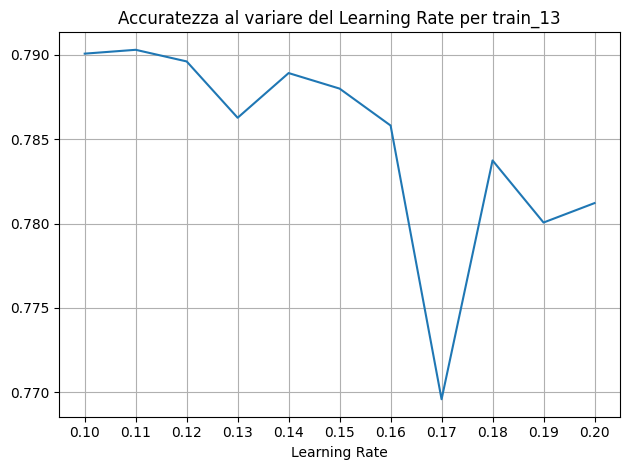

In [ ]:
fig, ax = plt.subplots()
ax.plot(learning_rate_score_13.Learning_Rate, learning_rate_score_13.Score)
ax.set(xlabel='Learning Rate', title="Accuratezza al variare del Learning Rate per train_13")
ax.set_xticks([0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2])
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "GB_lr_13.png")):
  plt.savefig(IMAGE_PATH + "GB_lr_13.png", format="png")
plt.show()

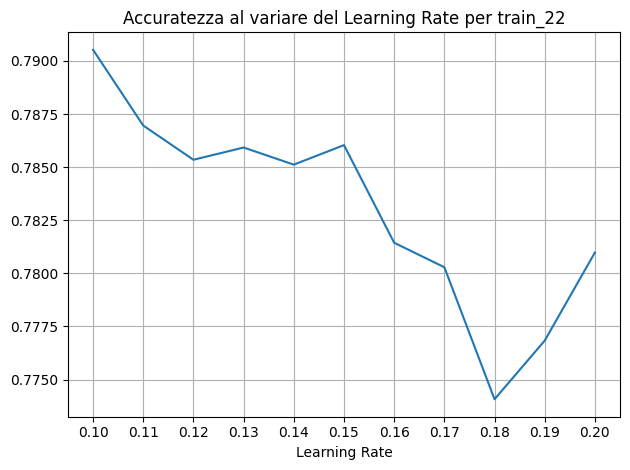

In [ ]:
fig, ax = plt.subplots()
ax.plot(learning_rate_score_22.Learning_Rate, learning_rate_score_22.Score)
ax.set(xlabel='Learning Rate', title="Accuratezza al variare del Learning Rate per train_22")
ax.set_xticks([0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2])
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "GB_lr_22.png")):
  plt.savefig(IMAGE_PATH + "GB_lr_22.png", format="png")
plt.show()

learning_rate migliore per train_13: 0.11

learning_rate migliore per train_22: 0.1 (deafault)

Setting subsample

In [ ]:
def set_subsample(train, test, l):
  columns = ['Subsample', 'Score']
  subsample_score = pd.DataFrame(columns=columns)
  subsamples = [0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

  for s in subsamples:
    grb = GradientBoostingClassifier(n_estimators=30, learning_rate=l, subsample=s)
    scores = cross_val_score(grb, train, test, cv=10)
    row = pd.DataFrame(data=[[s, scores.mean()]], columns=columns)
    subsample_score = pd.concat([subsample_score, row])

  return subsample_score

In [ ]:
subsample_score_13 = set_subsample(train_13, y_train_13, 0.11)
subsample_score_13

,Learning_Rate,Score
0,0.65,0.790985
0,0.70,0.792481
0,0.75,0.792021
0,0.80,0.789377
0,0.85,0.792367
0,0.90,0.790986
0,0.95,0.792943
0,1.00,0.790295


In [ ]:
subsample_score_22 = set_subsample(train_22, y_train_22, 0.1)
subsample_score_22

,Learning_Rate,Score
0,0.65,0.791792
0,0.70,0.787997
0,0.75,0.791217
0,0.80,0.792251
0,0.85,0.789721
0,0.90,0.786498
0,0.95,0.792367
0,1.00,0.790524


subsample migliore per train_13: 0.95

subsample migliore per train_22: 0.95

Setting max_depth

In [ ]:
def set_max_depth(train, test, l):
  columns = ['Max_depth', 'Score']
  max_depth_score = pd.DataFrame(columns=columns)
  max_depths = np.linspace(1,10,10,dtype=int)

  for d in max_depths:
    grb = GradientBoostingClassifier(n_estimators=30, learning_rate=l, subsample=0.95, max_depth=d)
    scores = cross_val_score(grb, train, test, cv=10)
    row = pd.DataFrame(data=[[d, scores.mean()]], columns=columns)
    max_depth_score = pd.concat([max_depth_score, row])

  return max_depth_score

In [ ]:
max_depth_score_13 = set_max_depth(train_13, y_train_13, 0.11)
max_depth_score_13

,Max_depth,Score
0,1,0.747272
0,2,0.784774
0,3,0.790642
0,4,0.779717
0,5,0.767061
0,6,0.760389
0,7,0.765910
0,8,0.755212
0,9,0.755902
0,10,0.750493


In [ ]:
max_depth_score_22 = set_max_depth(train_22, y_train_22, 0.1)
max_depth_score_22

,Max_depth,Score
0,1,0.737380
0,2,0.779483
0,3,0.787303
0,4,0.777417
0,5,0.772816
0,6,0.769131
0,7,0.762116
0,8,0.762458
0,9,0.755211
0,10,0.754174


max_depth migliore per train_13: 3 (default)

max_depth migliore per train_22: 3 (default)

Setting max_features

In [ ]:
def set_max_features(train, test, l, max_features:np.array):
  columns = ['Max_features', 'Score']
  max_features_score = pd.DataFrame(columns=columns)

  for f in max_features:
    grb = GradientBoostingClassifier(n_estimators=30, learning_rate=l, subsample=0.95, max_features=f)
    scores = cross_val_score(grb, train, test, cv=10)
    row = pd.DataFrame(data=[[f, scores.mean()]], columns=columns)
    max_features_score = pd.concat([max_features_score, row])

  return max_features_score

In [ ]:
max_features = np.linspace(1,13,13,dtype=int)
max_features_score_13 = set_max_features(train_13, y_train_13, 0.11, max_features)
max_features_score_13

,Max_features,Score
0,1,0.759816
0,2,0.776721
0,3,0.781898
0,4,0.784083
0,5,0.792826
0,6,0.789836
0,7,0.787649
0,8,0.788224
0,9,0.792712
0,10,0.793633


In [ ]:
max_features = np.linspace(1,22,22,dtype=int)
max_features_score_22 = set_max_features(train_22, y_train_22, 0.1, max_features)
max_features_score_22

,Max_features,Score
0,1,0.751526
0,2,0.770165
0,3,0.773500
0,4,0.778560
0,5,0.783395
0,6,0.787650
0,7,0.786960
0,8,0.789721
0,9,0.788802
0,10,0.788800


max_features migliore per train_13: 10

max_features migliore per train_22: 11

Setting min_sample_split

In [ ]:
def set_min_sample_split(train, test, l, f):
  columns = ['Min_sample_split', 'Score']
  min_sample_split_score = pd.DataFrame(columns=columns)
  min_sample_splits = np.linspace(2,20,19,dtype=int)

  for s in min_sample_splits:
    grb = GradientBoostingClassifier(n_estimators=30, learning_rate=l, subsample=0.95, max_features=f, min_samples_split=s)
    scores = cross_val_score(grb, train, test, cv=10)
    row = pd.DataFrame(data=[[s, scores.mean()]], columns=columns)
    min_sample_split_score = pd.concat([min_sample_split_score, row])

  return min_sample_split_score

In [ ]:
min_sample_split_score_13 = set_min_sample_split(train_13, y_train_13, 0.11, 10)
min_sample_split_score_13

,Min_sample_split,Score
0,2,0.792021
0,3,0.789145
0,4,0.790527
0,5,0.792597
0,6,0.791448
0,7,0.791217
0,8,0.789950
0,9,0.790297
0,10,0.791447
0,11,0.792252


In [ ]:
min_sample_split_score_22 = set_min_sample_split(train_22, y_train_22, 0.1, 11)
min_sample_split_score_22

,Min_sample_split,Score
0,2,0.791217
0,3,0.791562
0,4,0.787651
0,5,0.789146
0,6,0.786730
0,7,0.789031
0,8,0.790526
0,9,0.790526
0,10,0.788340
0,11,0.789951


min_sample_split migliore per train_13: 12

min_sample_split migliore per train_22: 3

Setting min_sample_leaf

In [ ]:
def set_min_sample_leaf(train, test, lr, f, mss):
  columns = ['Min_sample_leaf', 'Score']
  min_sample_leaf_score = pd.DataFrame(columns=columns)
  min_sample_leafs = np.linspace(1,30,30,dtype=int)

  for l in min_sample_leafs:
    grb = GradientBoostingClassifier(n_estimators=30, learning_rate=lr, subsample=0.95, max_features=f, min_samples_split=mss, min_samples_leaf=l)
    scores = cross_val_score(grb, train, test, cv=10)
    row = pd.DataFrame(data=[[l, scores.mean()]], columns=columns)
    min_sample_leaf_score = pd.concat([min_sample_leaf_score, row])

  return min_sample_leaf_score

In [ ]:
min_sample_leaf_score_13 = set_min_sample_leaf(train_13, y_train_13, 0.11, 10, 12)
min_sample_leaf_score_13

,Min_sample_leaf,Score
0,1,0.789146
0,2,0.792021
0,3,0.790641
0,4,0.790180
0,5,0.795472
0,6,0.790756
0,7,0.792943
0,8,0.789721
0,9,0.791102
0,10,0.791677


In [ ]:
min_sample_leaf_score_22 = set_min_sample_leaf(train_22, y_train_22, 0.1, 11, 3)
min_sample_leaf_score_22

,Min_sample_leaf,Score
0,1,0.790065
0,2,0.790527
0,3,0.789260
0,4,0.792367
0,5,0.789262
0,6,0.791216
0,7,0.790872
0,8,0.787534
0,9,0.790641
0,10,0.791332


min_sample_leaf migliore per train_13: 5

min_sample_leaf migliore per train_22: 4

In [ ]:
grb_13 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.11, subsample=0.95, max_features=10, min_samples_split=12, min_samples_leaf=5)
scores_13 = cross_val_score(grb_13, train_13, y_train_13, cv=cross_validation_13)
print("Accuratezza per ogni singolo sottoinsieme di training 13: ")
print(scores_13)
print("\nAccuratezza media di training 13: ")
print(scores_13.mean())
grb_13.fit(train_13, y_train_13)

Accuratezza per ogni singolo sottoinsieme di training 13: 
[0.79425287 0.75977011 0.76666667 0.79631761 0.77560414 0.81127733
 0.81357883 0.81127733 0.81703107 0.77675489]

Accuratezza media di training 13: 
0.7922530851950319


GradientBoostingClassifier(learning_rate=0.11, max_features=10,
                           min_samples_leaf=5, min_samples_split=12,
                           n_estimators=30, subsample=0.95)

In [ ]:
grb_22 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, subsample=0.95, max_features=11, min_samples_split=3, min_samples_leaf=4)
scores_22 = cross_val_score(grb_22, train_22, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di training 22: ")
print(scores_22)
print("\nAccuratezza media 22: ")
print(scores_22.mean())
grb_22.fit(train_22, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training 22: 
[0.78735632 0.75517241 0.77011494 0.78826237 0.77445339 0.80782509
 0.80552359 0.81818182 0.81012658 0.78481013]

Accuratezza media 22: 
0.7901826647090724


GradientBoostingClassifier(max_features=11, min_samples_leaf=4,
                           min_samples_split=3, n_estimators=30,
                           subsample=0.95)

Valutazione train_13 con aggiunta di Service_use ed Expenses

In [ ]:
grb_14 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.11, subsample=0.95, max_features=10, min_samples_split=12, min_samples_leaf=5)
train_14 = train_13.copy()
train_14['Service_use'] = 0
train_14['Service_use']  = train_14['VRDeck'] + train_14['RoomService'] + train_14['FoodCourt'] + train_14['ShoppingMall'] + train_14['Spa'] != 0.0
train_14['Service_use'] = train_14['Service_use'].astype(int)

scores_14 = cross_val_score(grb_14, train_14, y_train_13, cv=10)
print("Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: ")
print(scores_14)
print("\nAccuratezza media con aggiunta di Service_use: ")
print(scores_14.mean())

grb_14.fit(train_14, y_train_13)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.79195402 0.75632184 0.77356322 0.77560414 0.77905639 0.81357883
 0.80897583 0.81933257 0.81588032 0.76064442]

Accuratezza media con aggiunta di Service_use: 
0.78949115775829


GradientBoostingClassifier(learning_rate=0.11, max_features=10,
                           min_samples_leaf=5, min_samples_split=12,
                           n_estimators=30, subsample=0.95)

In [ ]:
grb_15 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.11, subsample=0.95, max_features=10, min_samples_split=12, min_samples_leaf=5)
train_15 = train_14.copy()
train_15['Expenses']  = train_15['VRDeck'] + train_15['RoomService'] + train_15['FoodCourt'] + train_15['ShoppingMall'] + train_15['Spa']

scores_15 = cross_val_score(grb_15, train_15, y_train_13, cv=10)
print("\nAccuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: ")
print(scores_15)
print("\nAccuratezza media con aggiunta di Service_use ed Expenses: ")
print(scores_15.mean())

grb_15.fit(train_15, y_train_13)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.78965517 0.75402299 0.76896552 0.78596087 0.78135788 0.81818182
 0.80437284 0.81127733 0.80552359 0.75258918]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.7871907199449758


GradientBoostingClassifier(learning_rate=0.11, max_features=10,
                           min_samples_leaf=5, min_samples_split=12,
                           n_estimators=30, subsample=0.95)

Valutazione train_22 con aggiunta di Service_use ed Expenses

In [ ]:
grb_23 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, subsample=0.95, max_features=11, min_samples_split=3, min_samples_leaf=4)
train_23 = train_22.copy()
train_23['Service_use'] = 0
train_23['Service_use']  = train_23['VRDeck'] + train_23['RoomService'] + train_23['FoodCourt'] + train_23['ShoppingMall'] + train_23['Spa'] != 0.0
train_23['Service_use'] = train_23['Service_use'].astype(int)

scores_23 = cross_val_score(grb_23, train_23, y_train_22, cv=10)
print("Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: ")
print(scores_23)
print("\nAccuratezza media con aggiunta di Service_use: ")
print(scores_23.mean())

grb_23.fit(train_23, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.78735632 0.75632184 0.77241379 0.79171461 0.7721519  0.80667434
 0.80667434 0.81472957 0.80897583 0.77100115]

Accuratezza media con aggiunta di Service_use: 
0.7888013703159927


GradientBoostingClassifier(max_features=11, min_samples_leaf=4,
                           min_samples_split=3, n_estimators=30,
                           subsample=0.95)

In [ ]:
grb_24 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, subsample=0.95, max_features=11, min_samples_split=3, min_samples_leaf=4)
train_24 = train_23.copy()
train_24['Expenses']  = train_24['VRDeck'] + train_24['RoomService'] + train_24['FoodCourt'] + train_24['ShoppingMall'] + train_24['Spa']

scores_24 = cross_val_score(grb_24, train_24, y_train_22, cv=10)
print("\nAccuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: ")
print(scores_24)
print("\nAccuratezza media con aggiunta di Service_use ed Expenses: ")
print(scores_24.mean())

grb_24.fit(train_24, y_train_22)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.79425287 0.75057471 0.77471264 0.78020713 0.7721519  0.80437284
 0.80667434 0.81357883 0.81012658 0.78481013]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.7891461979021996


GradientBoostingClassifier(max_features=11, min_samples_leaf=4,
                           min_samples_split=3, n_estimators=30,
                           subsample=0.95)

KAGGLE SUBMISSION

In [ ]:
def generateSubmission(myModel, testFile, add_service_use, add_expenses, submissionFile, description):
    # Read the test data
    X_test = pd.read_csv(DATA_PATH + testFile)
    Id = X_test.PassengerId
    X_test = X_test.drop(columns=['Unnamed: 0', 'PassengerId'])

    if(add_service_use):
      X_test['Service_use'] = 0
      X_test['Service_use']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa'] != 0.0
      X_test['Service_use'] = X_test['Service_use'].astype(int)
    if(add_expenses):
      X_test['Expenses']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa']

    # Use the model to make predictions
    y_test_pred = myModel.predict(X_test)
    for i in range(0,len(y_test_pred)-1):
      if(y_test_pred[i] > 0.5):
        y_test_pred[i] = 1
      else:
        y_test_pred[i] = 0

    y_test_pred = y_test_pred.astype(bool).reshape(len(y_test_pred))

    # submission file
    my_submission = pd.DataFrame({"PassengerId": Id, "Transported": y_test_pred})

    if not os.path.exists(OUTPUT_PATH):
      os.mkdir(OUTPUT_PATH)

    # you could use any filename. We choose submission here
    my_submission.to_csv(OUTPUT_PATH + submissionFile, index=False)

    # Submit authomatically; kaggle API authentication needed
    !kaggle competitions submit -c spaceship-titanic -f {OUTPUT_PATH + submissionFile} -m '{description}'

In [ ]:
generateSubmission(grb_24, True, True, "test_22.csv", "GradientBoosting_5.csv", "Miglior configurazione trovata per il training con 22 attributi + Expenses")

100% 56.3k/56.3k [00:00<00:00, 63.4kB/s]
Successfully submitted to Spaceship Titanic

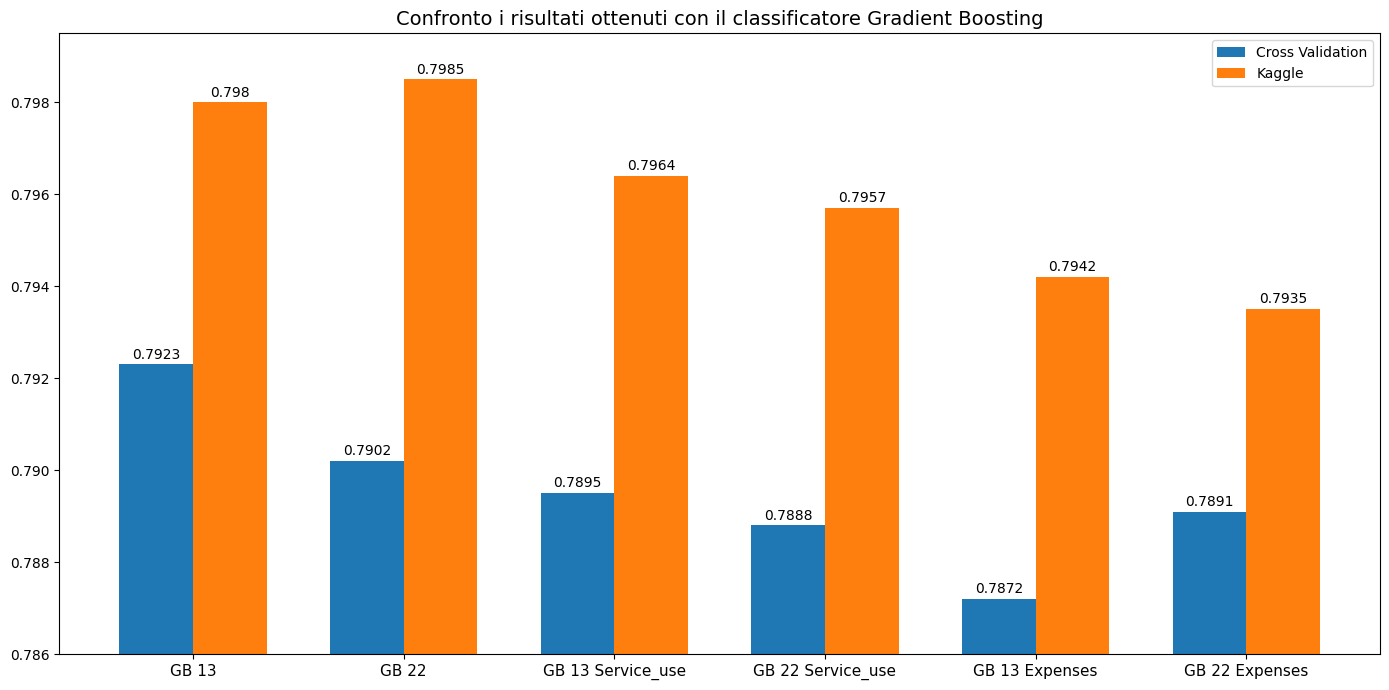

In [ ]:
classifers = ('GB 13', 'GB 22', 'GB 13 Service_use', 'GB 22 Service_use', 'GB 13 Expenses', 'GB 22 Expenses')
scores = {
    'Cross Validation': (0.7923, 0.7902, 0.7895, 0.7888, 0.7872, 0.7891),
    'Kaggle': (0.7980, 0.7985, 0.7964, 0.7957, 0.7942, 0.7935)
}

x = np.arange(len(classifers))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7))

for attribute, score in scores.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, score, width, label=attribute)
  ax.bar_label(rects, padding=2)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Confronto i risultati ottenuti con il classificatore Gradient Boosting', fontsize=14)
ax.set_ylim(0.7860, 0.7995)
ax.set_xticks(x+ width/2, classifers, fontsize=11)
ax.legend()

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "GB_Risultati.png")):
  plt.savefig(IMAGE_PATH + "GB_Risultati.png", format="png")
plt.show()